# Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('dark_background')

import plotly.express as px
import plotly.io as pio
pio.templates.default = 'plotly_dark'

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('data/eth.csv')
print(df.shape)
df

(2134, 7)


Date      Open_       High        Low    Close__  \
0     Jun 08, 2021  $2,594.60  $2,620.85  $2,315.55  $2,517.44   
1     Jun 07, 2021  $2,713.05  $2,845.19  $2,584.00  $2,590.26   
2     Jun 06, 2021  $2,629.75  $2,743.44  $2,616.16  $2,715.09   
3     Jun 05, 2021  $2,691.62  $2,817.48  $2,558.23  $2,630.58   
4     Jun 04, 2021  $2,857.17  $2,857.17  $2,562.64  $2,688.19   
...            ...        ...        ...        ...        ...   
2129  Aug 10, 2015      $0.71      $0.73      $0.64      $0.71   
2130  Aug 09, 2015      $0.71      $0.88      $0.63       $0.7   
2131  Aug 08, 2015      $2.79      $2.80      $0.71      $0.75   
2132  Aug 07, 2015      $2.83      $3.54      $2.52      $2.77   
2133  Jun 09, 2021  $2,510.20  $2,625.07  $2,412.20  $2,608.27   

               Volume         MarketCap  
0     $41,909,736,778  $292,557,075,207  
1     $30,600,111,277  $300,985,400,826  
2     $25,311,639,414  $315,453,931,558  
3     $30,496,672,724  $305,598,725,249  
4     $34,173,841,611  $312,256,566,095  
...               ...               ...  
2129         $405,283       $42,818,364  
2130         $532,170       $42,399,574  
2131         $674,188       $45,486,894  
2132         $164,329      $166,610,555  
2133  $36,075,832,186  $303,147,462,062  

[2134 rows x 7 columns]

# Goal and Data Description

## Data Source

This data was scraped from CoinMarketCap.com using the webscraper Octoparse. The webpages used ajax syntax for the "load page" button, and therfore ajax timeout time needed to be applied in order to properly extract the data. This data is only concerned with Ethereum, and no other coin or blockchain.

## Features

The data includes the following features:

1. Open
2. High
3. Low
4. Close 
5. Volume
6. Market Cap
<br>

This dataset provides a timeline of eth prices and related data from August 7th, 2015 to June 8th, 2021.
<br>


# Data Preprocessing

In [2]:
# Convert the 'Date' column to a datetime datatype and set it as the index, then sort the index
df['Date'] = pd.to_datetime(df.Date)
df.set_index(df.Date, inplace=True)
df.drop(df.tail(1).index, inplace=True)
df = df.sort_index()

# Drop the Date column
df = df.drop(columns=['Date'], axis=1)

# Specify columns
cols = list(df.columns)

# Replace the dollar signs and commas with empty character
df[cols] = df[cols].replace({'\$': '', ',': ''}, regex=True)

## Convert all entries to numerical data type
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
# Rename the columns with unconventinal text in the string
df.rename(columns={'Open_':'Open', 'Close__':'Close'}, inplace=True)

# Find missing values
print(df.isna().sum())

# There are very few missing values, so we will drop all of them
df = df.dropna()

# Check for duplicates in index
print(df.index.duplicated().sum())

# Check for duplicates in columns
print(df.duplicated().sum())

# Check how much of the data are duplicates overall
print(df[df.duplicated()==True].shape[0] / df.shape[0])

# There are no duplicates but let's use the drop_duplciates method just as good practice
df = df.drop_duplicates()
print(df.shape)
df.info()

Open         0
High         0
Low          0
Close        0
Volume       0
MarketCap    0
dtype: int64
0
0
0.0
(2133, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2133 entries, 2015-08-07 to 2021-06-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2133 non-null   float64
 1   High       2133 non-null   float64
 2   Low        2133 non-null   float64
 3   Close      2133 non-null   float64
 4   Volume     2133 non-null   int64  
 5   MarketCap  2133 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 116.6 KB


# EDA

### Original Time Series Visualizations

Let's take a look at the time series.

In [3]:
# Import graph objects
import plotly.graph_objects as go
fig = go.Figure()

# Add traces
for c in list(df.columns):
    fig.add_trace(go.Scatter(x=df.index, y=df[c], mode='lines', name=f'{c}'))
fig

### Histograms

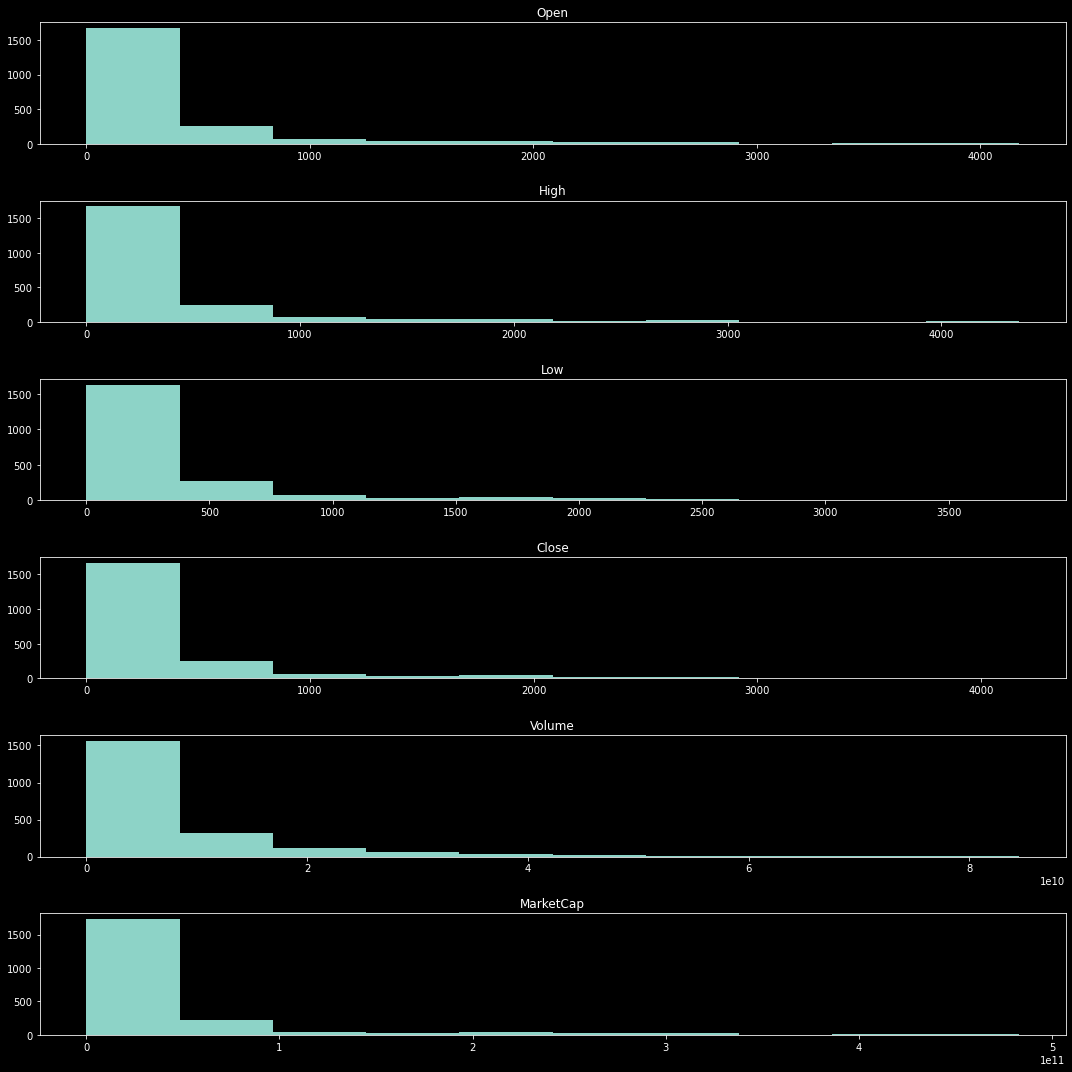

In [19]:
fig, ax = plt.subplots(6, figsize=(15,15))
for i, x in enumerate(list(df.columns)):
    ax[i].hist(df[x])
    ax[i].set_title(f'{list(df.columns)[i]}')
plt.tight_layout()
plt.savefig('Histograms')

These histograms exemplify the volatility of the asset. The large majority of prices fall 0 and 1000, however there are low-frequency instances of prices that are 2, 3, and 4 times the max value of that range. This shows that the price spiked and fell, never maintaining a high value for very long at all. 

### Clean up the Graphs

The original time series was very hard to interpret because the volume column has very large numbers that messed with the scale of the graph. In order to remedy this, we will plot the price data and the volume data seperately, and we will resample the Volume data in order

In [4]:
# Plot the time series
fig = go.Figure()
col = ['Open', 'High', 'Low', 'Close']

# Add traces
for c in col:
    fig.add_trace(go.Scatter(x=df.index, y=df[c], mode='lines', name=f'{c}'))
fig.update_layout(
title='Price Data',
xaxis_title='Date',
yaxis_title='Price',
legend_title='Legend')
fig.show()
display(px.line(data_frame=df, x=df.index, y=df['Volume'], title='Volume Data'))

ValueError: 
The orca executable is required to export figures as static images,
but it could not be found on the system path.

Searched for executable 'orca' on the following path:
    C:\Users\camla\anaconda3\envs\learn-env
    C:\Users\camla\anaconda3\envs\learn-env\Library\mingw-w64\bin
    C:\Users\camla\anaconda3\envs\learn-env\Library\usr\bin
    C:\Users\camla\anaconda3\envs\learn-env\Library\bin
    C:\Users\camla\anaconda3\envs\learn-env\Scripts
    C:\Users\camla\anaconda3\envs\learn-env\bin
    C:\Users\camla\anaconda3\condabin
    C:\Users\camla\bin
    C:\Program Files\Git\mingw64\bin
    C:\Program Files\Git\usr\local\bin
    C:\Program Files\Git\usr\bin
    C:\Program Files\Git\usr\bin
    C:\Program Files\Git\mingw64\bin
    C:\Program Files\Git\usr\bin
    C:\Users\camla\bin
    C:\Program Files (x86)\Razer Chroma SDK\bin
    C:\Program Files\Razer Chroma SDK\bin
    C:\Program Files (x86)\Razer\ChromaBroadcast\bin
    C:\Program Files\Razer\ChromaBroadcast\bin
    C:\Program Files\Google\Chrome\Application
    C:\Windows\system32
    C:\Windows
    C:\Windows\System32\Wbem
    C:\Windows\System32\WindowsPowerShell\v1.0
    C:\Windows\System32\OpenSSH
    C:\Users\camla\AppData\Local\Microsoft\WindowsApps
    C:\Program Files\NVIDIA Corporation\NVIDIA NvDLISR
    C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common
    C:\WINDOWS\system32
    C:\WINDOWS
    C:\WINDOWS\System32\Wbem
    C:\WINDOWS\System32\WindowsPowerShell\v1.0
    C:\WINDOWS\System32\OpenSSH
    C:\WINDOWS\system32\config\systemprofile\AppData\Local\Microsoft\WindowsApps
    C:\Program Files\Git\cmd
    C:\WINDOWS\system32
    C:\WINDOWS
    C:\WINDOWS\System32\Wbem
    C:\WINDOWS\System32\WindowsPowerShell\v1.0
    C:\WINDOWS\System32\OpenSSH
    C:\Program Files\Graphviz\bin
    C:\Users\camla\AppData\Local\Microsoft\WindowsApps
    C:\Users\camla\AppData\Local\Programs\Microsoft VS Code Insiders\bin
    C:\Users\camla\AppData\Local\Programs\Microsoft VS Code\bin
    C:\Program Files\Git\usr\bin\vendor_perl
    C:\Program Files\Git\usr\bin\core_perl

If you haven't installed orca yet, you can do so using conda as follows:

    $ conda install -c plotly plotly-orca

Alternatively, see other installation methods in the orca project README at
https://github.com/plotly/orca

After installation is complete, no further configuration should be needed.

If you have installed orca, then for some reason plotly.py was unable to
locate it. In this case, set the `plotly.io.orca.config.executable`
property to the full path of your orca executable. For example:

    >>> plotly.io.orca.config.executable = '/path/to/orca'

After updating this executable property, try the export operation again.
If it is successful then you may want to save this configuration so that it
will be applied automatically in future sessions. You can do this as follows:

    >>> plotly.io.orca.config.save()

If you're still having trouble, feel free to ask for help on the forums at
https://community.plot.ly/c/api/python


Target Variable

The trends of each series for each price related column (our target) are pretty much identical, so we can choose one of the features as a target variable and stick with that.
<br>

I will be using the "Close" price for Ethereum, which is the price of the asset at the close of normal trading hours at 4pm. 

### Resample Data (Week, Month, Year)

In [16]:
# Create resampled DataFrame for more smooth visualization
quarterly_df = pd.DataFrame(df.resample('Q').mean())

# Plot the time series
fig = go.Figure()
col = ['Open', 'High', 'Low', 'Close']
# Add traces
for c in col:
    fig.add_trace(go.Scatter(x=quarterly_df.index, y=quarterly_df[c], mode='lines', name=f'{c}'))
fig.update_layout(
title='Price Data',
xaxis_title='Date',
yaxis_title='Price',
legend_title='Legend')
fig.show()
display(px.line(data_frame=quarterly_df, x=quarterly_df.index, y=quarterly_df['Volume'], title='Volume Data'))

### Autocorrelation Plots

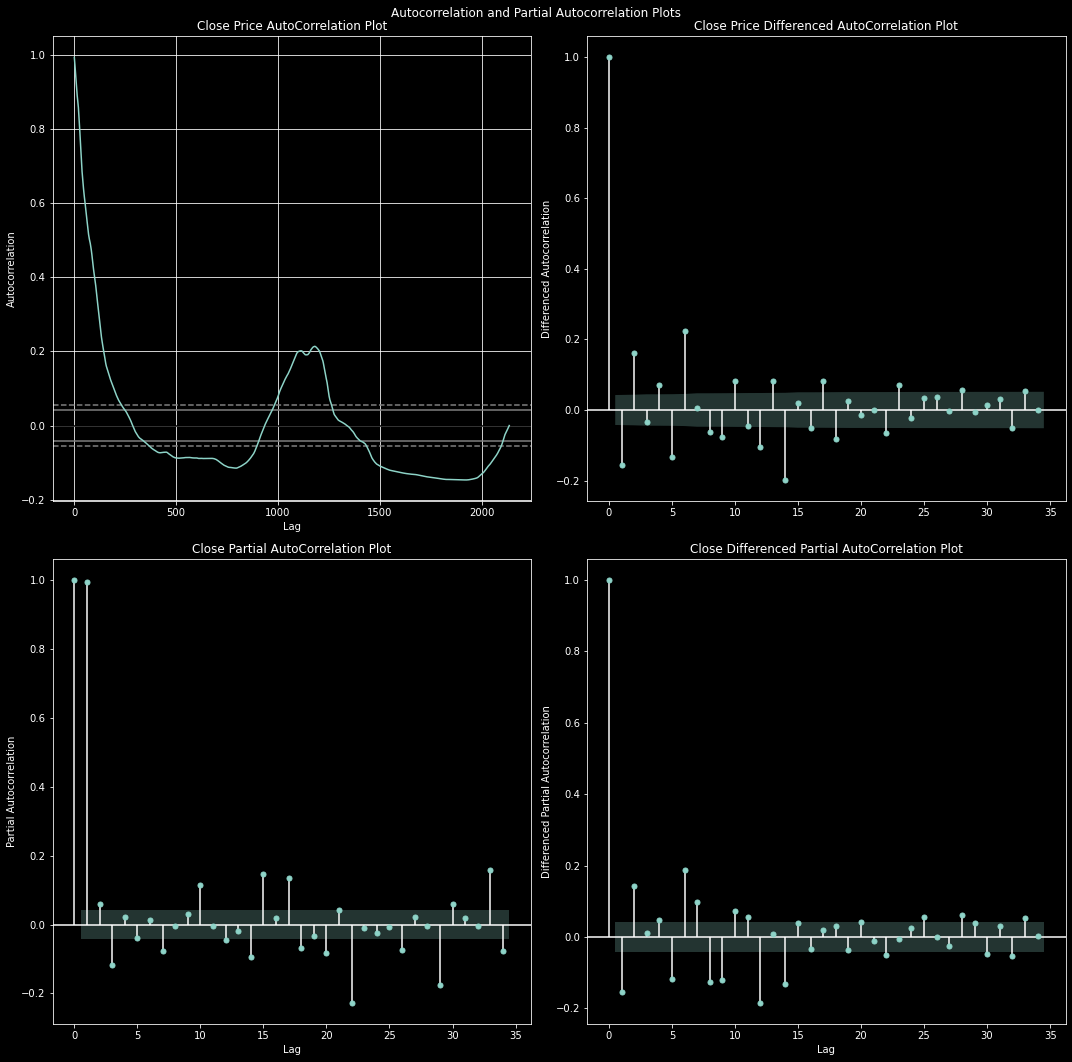

In [7]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

autocorrelation_plot(df['Close'].dropna(), ax=ax[0][0])
ax[0][0].set_title('Close Price AutoCorrelation Plot')

plot_acf(df['Close'].diff().dropna(), ax=ax[0][1])
ax[0][1].set_title('Close Price Differenced AutoCorrelation Plot')
ax[0][1].set_ylabel('Differenced Autocorrelation')

plot_pacf(df['Close'].dropna(), ax=ax[1][0])
ax[1][0].set_title('Close Partial AutoCorrelation Plot')
ax[1][0].set_xlabel('Lag')
ax[1][0].set_ylabel('Partial Autocorrelation')

plot_pacf(df['Close'].diff().dropna(), ax=ax[1][1])
ax[1][1].set_title('Close Differenced Partial AutoCorrelation Plot')
ax[1][1].set_xlabel('Lag')
ax[1][1].set_ylabel('Differenced Partial Autocorrelation')

plt.suptitle('Autocorrelation and Partial Autocorrelation Plots')
plt.tight_layout()
plt.savefig('acf_plots')

### Test Stationarity

In [275]:
from statsmodels.tsa.stattools import adfuller

# ADF Test for Non-differenced target variable
result = adfuller(df['Close'], autolag='AIC')
print('NON-DIFFERENCED TARGET VARIABLE')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

print(' ')
print(' ')

# ADF Test for Differenced target variable
result = adfuller(df['Close'].diff().dropna(), autolag='AIC')
print('DIFFERENCED TARGET VARIABLE')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


NON-DIFFERENCED TARGET VARIABLE
ADF Statistic: 1.0029061147236613
p-value: 0.9942965169904011
 
 
DIFFERENCED TARGET VARIABLE
ADF Statistic: -9.300900887869778
p-value: 1.1132363356592992e-15


- A first-order difference is enough to stationarize the data

### Rolling Averages

In [11]:
# Full compiled graph of 30-day, 90-day, and 365-day rolling averages

fig = go.Figure()


df_30d_rol = df['Close'].rolling(window = 30).mean()
df_90d_rol = df['Close'].rolling(window = 90).mean()
df_365d_rol = df['Close'].rolling(window = 365).mean()
fig.add_trace(go.Scatter(x=df.index, y=df_30d_rol, mode='lines', name=f'30d Close'))
fig.add_trace(go.Scatter(x=df.index, y=df_90d_rol, mode='lines', name=f'90d Close'))
fig.add_trace(go.Scatter(x=df.index, y=df_365d_rol, mode='lines', name=f'365d Close'))

fig.update_layout(
title='Price Data',
xaxis_title='Date',
yaxis_title='Price',
legend_title='Legend')
fig.show()

The rolling averages calculated from three different windows (30, 90, 365) provide some more insight to the data. As the window increases in size, the rolling averages' values have very different values during the highly volatile periods of the price of Ethereum. This volatility resulted in each of these periods having wildly different minimum and maximum values, which results in rolling averages that also different by quite a lot. Unsurprisingly, the 30-day and 90-day rolling averages were the most closely related, especially during the first period of steep upwards trend. The prices did not reach magnitude differences during these windows that warranted such a drastic rolling average difference. However, at the end of our time period, the rolling averages end up differing in value by almost $500, which goes to show the extreme volatility that Ethereum experienced during this time period (the most recent months when Ethereum had a meteoric rise). In short summary, the 365-day moving average had the lowest average value because it generalized the most volatility, however its final value was very below the true price. The 30-day moving average had the highest value because it strongly accounted for the high volatility, and its final value was a little higher than the true price (the extreme upper values pulled the average upwards). The 90-day moving average was the closest to the true price, showing that it both accounted for and generalized the volatility the best of the three windows!

### Seasonality

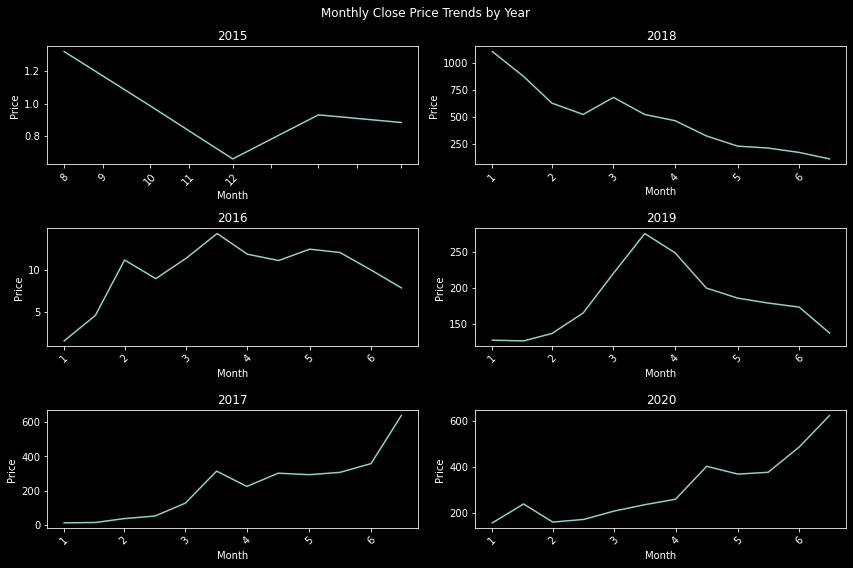

In [12]:
# Investigate Monthly Seasonality per Year

fig, ax = plt.subplots(3,2, figsize=(12, 8))

ax[0][0].plot(monthly_df['Close']['2015'])
ax[0][0].set_title('2015')
ax[0][0].set_xlabel('Month')
ax[0][0].set_ylabel('Price')
ax[0][0].set_xticklabels(labels=monthly_df['Close']['2015'].index.month,rotation=45)

ax[1][0].plot(monthly_df['Close']['2016'])
ax[1][0].set_title('2016')
ax[1][0].set_xlabel('Month')
ax[1][0].set_ylabel('Price')
ax[1][0].set_xticklabels(labels=monthly_df['Close']['2016'].index.month,rotation=45)

ax[2][0].plot(monthly_df['Close']['2017'])
ax[2][0].set_title('2017')
ax[2][0].set_xlabel('Month')
ax[2][0].set_ylabel('Price')
ax[2][0].set_xticklabels(labels=monthly_df['Close']['2017'].index.month,rotation=45)


ax[0][1].plot(monthly_df['Close']['2018'])
ax[0][1].set_title('2018')
ax[0][1].set_xlabel('Month')
ax[0][1].set_ylabel('Price')
ax[0][1].set_xticklabels(labels=monthly_df['Close']['2018'].index.month,rotation=45)


ax[1][1].plot(monthly_df['Close']['2019'])
ax[1][1].set_title('2019')
ax[1][1].set_xlabel('Month')
ax[1][1].set_ylabel('Price')
ax[1][1].set_xticklabels(labels=monthly_df['Close']['2019'].index.month,rotation=45)


ax[2][1].plot(monthly_df['Close']['2020'])
ax[2][1].set_title('2020')
ax[2][1].set_xlabel('Month')
ax[2][1].set_ylabel('Price')
ax[2][1].set_xticklabels(labels=monthly_df['Close']['2020'].index.month,rotation=45)

plt.suptitle('Monthly Close Price Trends by Year')
plt.tight_layout()

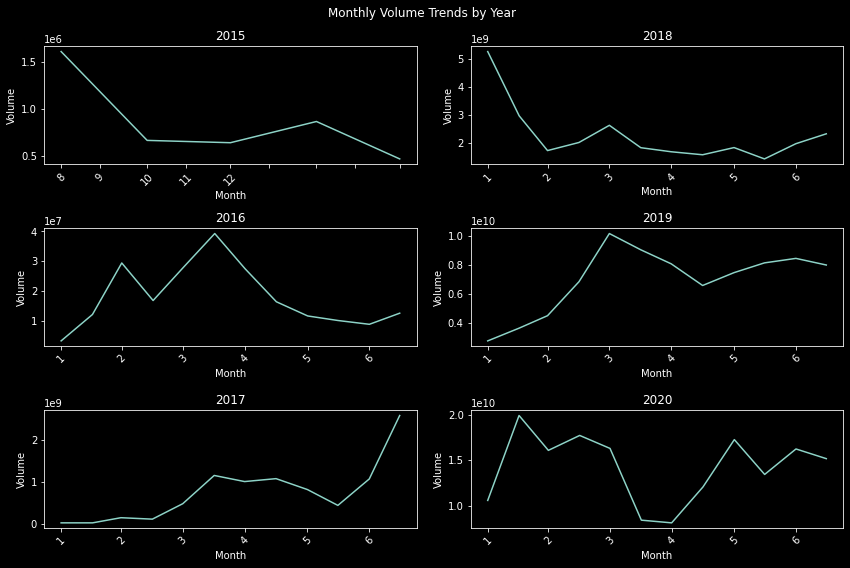

In [13]:
# Investigate Monthly Seasonality per Year

fig, ax = plt.subplots(3,2, figsize=(12,8))

ax[0][0].plot(monthly_df['Volume']['2015'])
ax[0][0].set_title('2015')
ax[0][0].set_xlabel('Month')
ax[0][0].set_ylabel('Volume')
ax[0][0].set_xticklabels(labels=monthly_df['Close']['2015'].index.month,rotation=45)

ax[1][0].plot(monthly_df['Volume']['2016'])
ax[1][0].set_title('2016')
ax[1][0].set_xlabel('Month')
ax[1][0].set_ylabel('Volume')
ax[1][0].set_xticklabels(labels=monthly_df['Volume']['2016'].index.month,rotation=45)

ax[2][0].plot(monthly_df['Volume']['2017'])
ax[2][0].set_title('2017')
ax[2][0].set_xlabel('Month')
ax[2][0].set_ylabel('Volume')
ax[2][0].set_xticklabels(labels=monthly_df['Volume']['2017'].index.month,rotation=45)


ax[0][1].plot(monthly_df['Volume']['2018'])
ax[0][1].set_title('2018')
ax[0][1].set_xlabel('Month')
ax[0][1].set_ylabel('Volume')
ax[0][1].set_xticklabels(labels=monthly_df['Volume']['2018'].index.month,rotation=45)


ax[1][1].plot(monthly_df['Volume']['2019'])
ax[1][1].set_title('2019')
ax[1][1].set_xlabel('Month')
ax[1][1].set_ylabel('Volume')
ax[1][1].set_xticklabels(labels=monthly_df['Volume']['2019'].index.month,rotation=45)


ax[2][1].plot(monthly_df['Volume']['2020'])
ax[2][1].set_title('2020')
ax[2][1].set_xlabel('Month')
ax[2][1].set_ylabel('Volume')
ax[2][1].set_xticklabels(labels=monthly_df['Volume']['2020'].index.month,rotation=45)

plt.suptitle('Monthly Volume Trends by Year')
plt.tight_layout()

There are no seasonal trends shown. Each year shows varying periods of time where the price and volume experienced both upwards and downwards trends. Since 

### Findings

Ethereum prices follow what is called a "cyclical trend", which means that it has trends however these trends so no specific pattern of repetition. To illustrate this, we can look at two of the graphs, which are both displayed above. 

From the year 2015 to the first quarter of 2017, the price of Ethereum remained quite stationary, with a very strong rise starting between March and April, which led to a strong upwards trend that lasted throughout the rest of the year of 2017, bring the price to a maximum value of 826.82 by the end of the year. This constituted a 10,106 percent price increase from the minimum price of 8.17 in the year of 2017, which is by all standards a very strong upwards trend. The volume of trades also followed this trend quite closely, matching the sentiment idea that as an asset shoots up in price, more people attempt to join in on the ride, and hence more trades are made. After the year 2017, the price of Ethereum immediately started a strong downwards trend beginning in January of 2018, and by the end of 2018 the price had settled to a minimum value of 84.30, roughly a 94% drop from its all time high at the very beginning of 2018. Volume for the rest of 2018 remained on average higher than the two years afterwards and the year before because at first people were participating in frequent trades due to the meteoric rise in price, and then people continued to sell their coins over the year as the price tanked. From 2019 to mid-2020, the price once again mostly resumed the stationary trend that it had exemplified from 2015 to about a quarter of the way through 2017, indicating that perhaps people lost interest in the Ethereum block-chain, doubted its potential, or simply moved on to different investments. There was a sharp rise in prise to a little over 250 during 2019, but it just as quickly fell back to close to the minimum value of that year, failing to breakout of its strong downwards trend. The volume from 2019 to mid-2020 would never drop to the levels seen before the coin's meteoric rise, most likely because such a note-worthy event put Ethereum on the map permanently. During 2019, there was a sharp rise and fall in volume that mirrored the trend of the quick rise and fall of price during that year. 2019-2021 would be the period of time when Ethereum would consistently reflect a yearly upwards trend. Volume was higher than its ever been, and the price rose to an unprecedented level of roughly 4000. During this upwards trend, there were several downwards trends that occured during certain months of the years. They seemed to be relatively random, with no predictability in their occurences, highlighting the unstationarity of the price of Ethereum, and also the idea that the price follows a "cyclical trend". There are very clear bull and bear markets, however the trickly part is timing these.  



# Modeling

## Scale the Data

We are going to want to scale the data because of the massive magnitude differences between values. This will most likely improve the accuracy of our forecast

In [17]:
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
scaled_data = pd.DataFrame(ss.fit_transform(df), columns=df.columns, index=df.index)

## ARIMA Model

In [ ]:
### Train-Test-Split the Non-Scaled Data
y_train = df['Close'][:'2019-06-13']
y_test = df['Close']['2019-06-14':] 

###
y_train_scaled = scaled_data['Close'][:'2019-06-13']
y_test_scaled = scaled_data['Close']['2019-06-14':] 

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1407
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6277.174
Date:                Mon, 14 Jun 2021   AIC                          12564.348
Time:                        13:43:47   BIC                          12590.590
Sample:                    08-07-2015   HQIC                         12574.155
                         - 06-13-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0340      0.060      0.570      0.569      -0.083       0.151
ar.L2          0.8248      0.054     15.280      0.000       0.719       0.931
ma.L1          0.0073      0.061      0.120      0.9

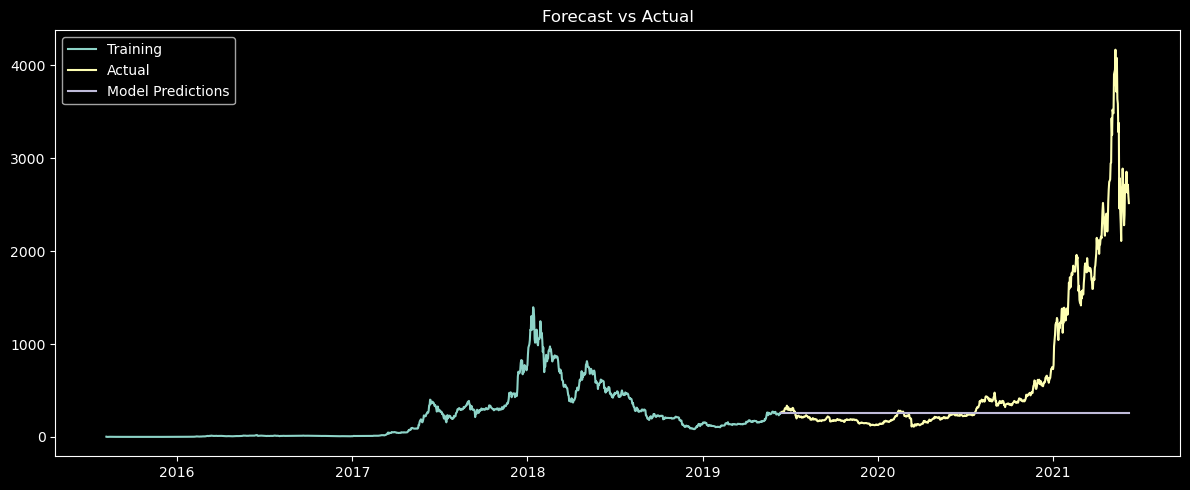

In [288]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima.model import ARIMA

# Build a 1,1,1 ARIMA model
p, d, q = 2, 1, 2
model = ARIMA(y_train, order=(p, d, q))
model_fit = model.fit()


### Model Summary
print(model_fit.summary())


### Forecast
forecast, se, conf = model_fit.forecast(3, alpha=0.05)


### Convert to series so we can plot the data
forecast_series = pd.Series(forecast, index=y_test.index)


### Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(y_train, label='Training')
plt.plot(y_test, label='Actual')
plt.plot(forecast_series, label='Model Predictions')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left')
plt.tight_layout()

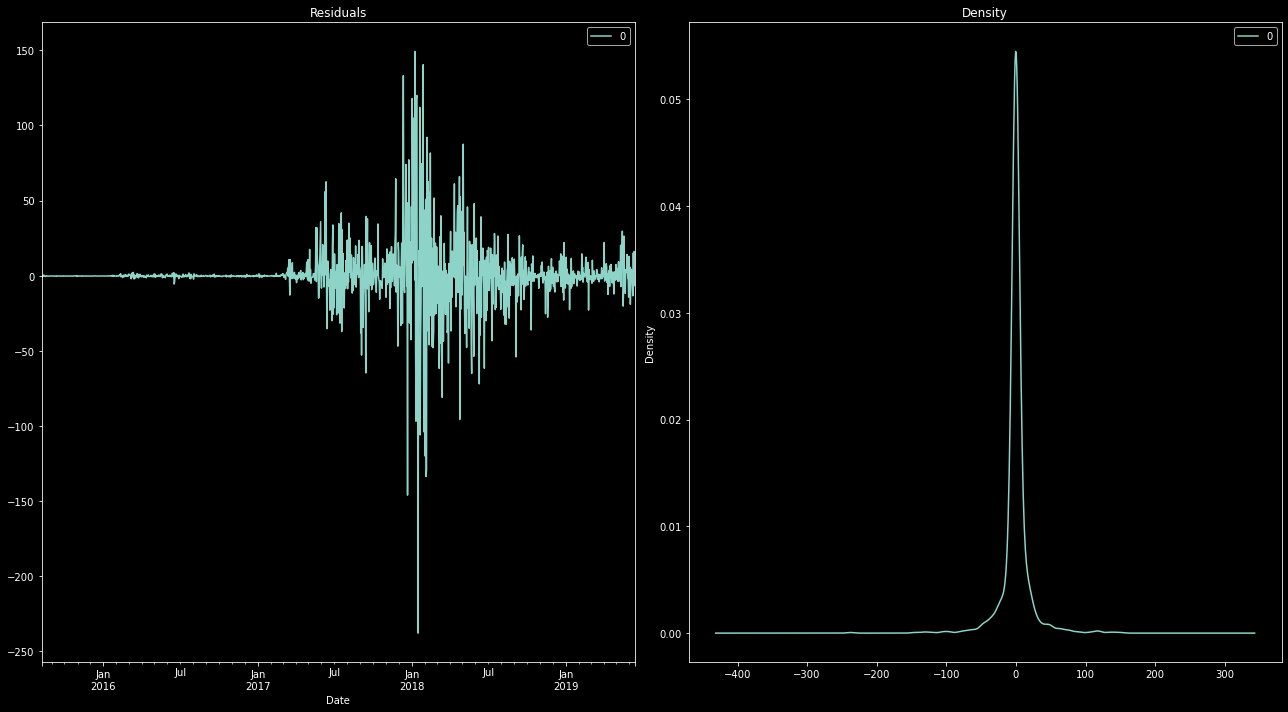

In [21]:
# Calculate Residuals
residuals = pd.DataFrame(model_fit.resid)

# Plot residuals
fig, ax = plt.subplots(1,2, figsize=(18,10))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])

plt.tight_layout()

The ARIMA model performed poorly for the data provided. This can almost certainly be attributed to the exaggerated volatility of Ethereum prices. The period of time that ARIMA was trained on showed an interesting trend. The price remained low, then spiked to a value that was much higher than before, and just as quickly fell down to a very low value again and remained there for quite some time. In other words, it was relatively stationary, then had a steep upwards trend, a steep downwards trend, and then remained relatively stationary again. The two main determinants of ARIMA predicitons, past values and moving average, are very hard to predict upon because thei values vary by so much. In order to try and improve my model, I will be using the "pmdarima" package to try and optimize the hyperparamters of the ARIMA model.

## Auto-ARIMA

In [284]:
import pmdarima as pm
model = pm.auto_arima(y_train, D=1)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1407
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -6277.836
Date:                Mon, 14 Jun 2021   AIC                          12561.672
Time:                        13:42:31   BIC                          12577.417
Sample:                             0   HQIC                         12567.557
                               - 1407                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8868      0.031    -28.690      0.000      -0.947      -0.826
ma.L1          0.9183      0.027     33.923      0.000       0.865       0.971
sigma2       442.3797      4.649     95.156      0.000     433.268     451.492
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):             38580.87
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):             877.14   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

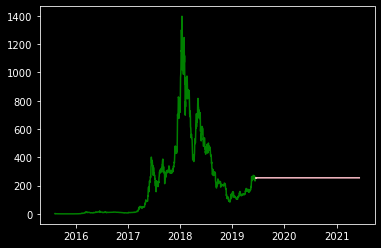

In [285]:
# make your forecasts
forecasts = model.predict(y_test.shape[0])  # predict N steps into the future
# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y_test.shape[0])
plt.plot(df.index[:len(y_train)], y_train, c='green')
plt.plot(df.index[len(y_train):], forecasts, c='pink')
plt.show()

Once again, the arima function did not perform well at all. It is time to move on to a different model type in order to try and improve our results. 

## Sarima and One-Step-Ahead Model

### Grid Search

In [224]:
import itertools
y=df['Close'].diff().dropna()
def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    best_aic = float('+inf')
    
    
    for param in pdq:
        for s_param in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=s_param)

                results = mod.fit()
                
                if results.aic < best_aic:
                    best_aic = results.aic
                    optimal_param = param
                    s_optimal_param = s_param

                    print(f'SARIMA{param}x{s_param} - AIC:{results.aic}')
            except:
                continue
    print(f'Optimal Parameters for SARIMA Model: SARIMA{optimal_param}x{s_optimal_param} - AIC:{best_aic}')


In [225]:
### Grid Search

sarima_grid_search(y,52)

SARIMA(0, 0, 0)x(0, 0, 0, 52) - AIC:22443.34146633209
SARIMA(0, 0, 0)x(0, 0, 1, 52) - AIC:22440.348789537602
SARIMA(0, 0, 0)x(0, 1, 0, 52) - AIC:22437.413628604478
SARIMA(0, 0, 0)x(0, 1, 1, 52) - AIC:22011.181570358596
SARIMA(0, 0, 1)x(0, 1, 1, 52) - AIC:21981.07647028625
SARIMA(1, 0, 0)x(0, 1, 1, 52) - AIC:21970.314456685082
SARIMA(1, 0, 1)x(0, 1, 1, 52) - AIC:21922.107177010155
SARIMA(1, 0, 1)x(1, 1, 1, 52) - AIC:21921.58754599936
Optimal Parameters for SARIMA Model: SARIMA(1, 0, 1)x(1, 1, 1, 52) - AIC:21921.58754599936


### Model Predictions

In [289]:
def sarima_and_plots(series, order, order_season, prediction_date):
    
    
    
    ### Train model
    model = sm.tsa.statespace.SARIMAX(series, order=order, order_season=order_season)
    results = model.fit()
    print(results.summary().tables[1])
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    
    
    
    ### RMSE for One-Step_Ahead Forecast
    pred = results.get_prediction(start=pd.to_datetime(prediction_date), dynamic=False)
    forecast = pred.predicted_mean
    mse = ((forecast - y_test) ** 2).mean()
    print(f'The Sarima RMSE for the One-Step-Ahead Forecast is {round(np.sqrt(mse), 2)}')




    ### Plot One-step Ahead Forecast
    ax = series.plot(label='Observed')
    forecast.plot(ax=ax, label='One-step Ahead Model Predictions of Data', alpha=.7, figsize=(15, 10))
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')
    plt.legend()
    plt.show()




    ### Root-Mean-Squared-Error of Dynamic Forecast
    pred_dynamic = results.get_prediction(start=pd.to_datetime(prediction_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    forecast_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((forecast_dynamic - y_test) ** 2).mean()
    print(f'The Sarima RMSE for the Dynamic Model Predictions is {round(np.sqrt(mse_dynamic), 2)}')
    
    
    
    ### Plot Dynamic Forecast
    ax = y_train.plot(label='Observed')
    forecast_dynamic.plot(label='Dynamic Model Predictions of Data', ax=ax, figsize=(15, 10))

    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')

    plt.legend()
    plt.show()
    
    return (results)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8127      0.011    -72.349      0.000      -0.835      -0.791
ma.L1          0.6917      0.014     48.598      0.000       0.664       0.720
ma.L2          0.0112      0.006      1.770      0.077      -0.001       0.024
sigma2      2078.1088     10.552    196.947      0.000    2057.428    2098.790


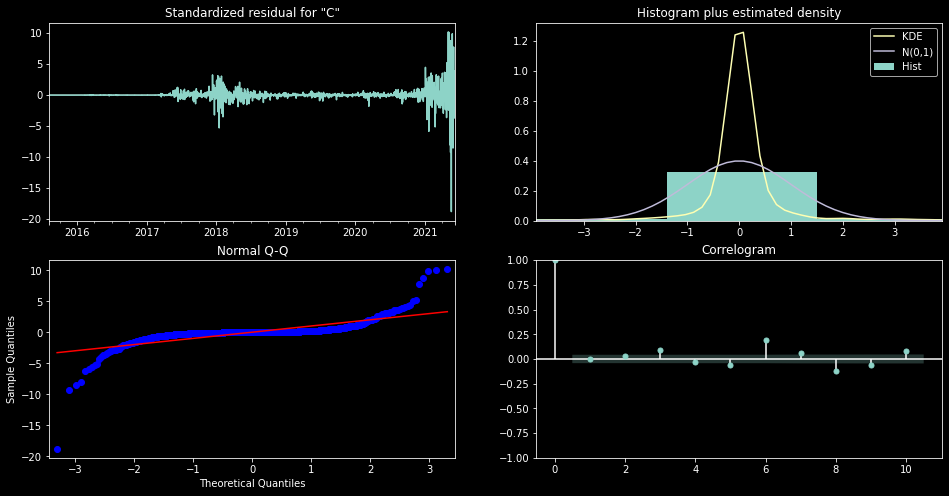

The Sarima RMSE for the One-Step-Ahead Forecast is 72.12


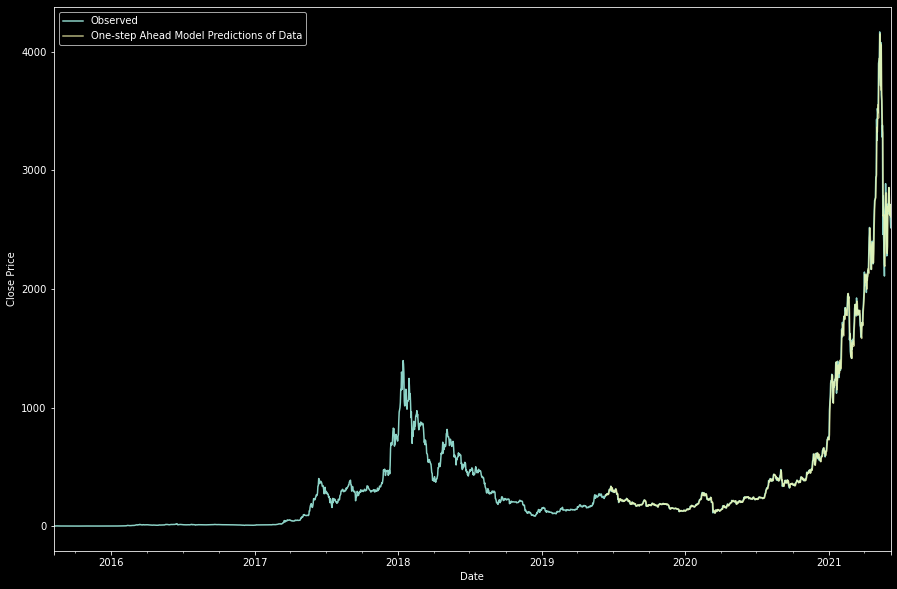

The Sarima RMSE for the Dynamic Model Predictions is 914.44


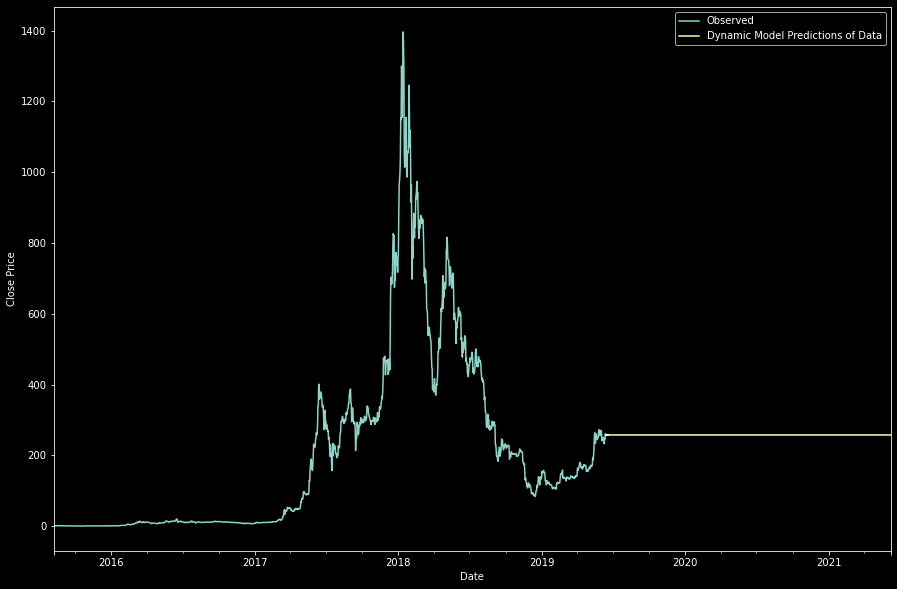

In [290]:
series = df['Close']
model = sarima_and_plots(series, (1, 1, 2), (1, 1, 1, 90), '2019-06-14')

The one-step ahead model performed very well, however the SARIMAX model performed very poorly, similarly to the ARIMA model. The inclusion of potential seasonality and exogenous variables did not aid the model in performing any better. It seems that in order to achieve better results, we will need to utilize a model that can better account for the complex, volatile movement of the Ethereum prices. To do this, we will explore Facebook Prophet and three different kinds of Neural Networks, LSTM, SANN, and SVM.

## Prophet

- Prophet is an open-source library developed by Facebook
- It is designed specifically for univariate time series data

## Deep Learning

### LSTM

#### LSTM With Manual Timeseries Sampling

In [74]:
da = df['Close']

In [128]:
# Specify data and create two empty lists that will carry our historical data, and then our target data
data = da
hist = []
target = []

# Specify the length of each time-step, and have the history list contain all of the data with 
# 90-day time steps that shift by one day each group
## Every group of values in X has one corresponding predicted value of y
length = 90
for i in range(len(data)-length):
    x = data[i : i+length]
    y = data[i+length]
    hist.append(x)
    target.append(y)
    
# Convert the data to an array
hist = np.array(hist)
target = np.array(target)
target = target.reshape(-1,1)

# Scale the data to avoid magnitude difference noise
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_hist = scaler.fit_transform(hist)
scaled_target = scaler.fit_transform(target)

# Reshape data so it can be used in a Neural Network
scaled_hist = scaled_hist.reshape((len(scaled_hist), length, 1))

# Create the train and test sets
X_train = scaled_hist[:1800,:,:]
X_test = scaled_hist[1800:,:,:]
y_train = scaled_target[:1800,:]
y_test = scaled_target[1800:,:]

In [129]:
# Create the model!

from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(units=32, return_sequences=True,
                  input_shape=(90,1), dropout=0.2))
model.add(LSTM(units=32, return_sequences=True,
                  dropout=0.2))
model.add(LSTM(units=32, dropout=0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error', metric=['accuracy', 'MeanSquaredError'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 90, 32)            4352      
_________________________________________________________________
lstm_24 (LSTM)               (None, 90, 32)            8320      
_________________________________________________________________
lstm_25 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [130]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
57/57 [==============================] - 5s 83ms/step - loss: 0.0012
Epoch 2/10
57/57 [==============================] - 6s 99ms/step - loss: 3.8454e-04
Epoch 3/10
57/57 [==============================] - 5s 95ms/step - loss: 3.1591e-04
Epoch 4/10
57/57 [==============================] - 5s 94ms/step - loss: 3.2618e-04
Epoch 5/10
57/57 [==============================] - 6s 98ms/step - loss: 3.0833e-04
Epoch 6/10
57/57 [==============================] - 6s 100ms/step - loss: 2.7347e-04
Epoch 7/10
57/57 [==============================] - 6s 99ms/step - loss: 2.7758e-04
Epoch 8/10
57/57 [==============================] - 6s 97ms/step - loss: 2.6665e-04: 3s - loss: 
Epoch 9/10
57/57 [==============================] - 6s 103ms/step - loss: 2.3787e-04
Epoch 10/10
57/57 [==============================] - 6s 102ms/step - loss: 2.4487e-04


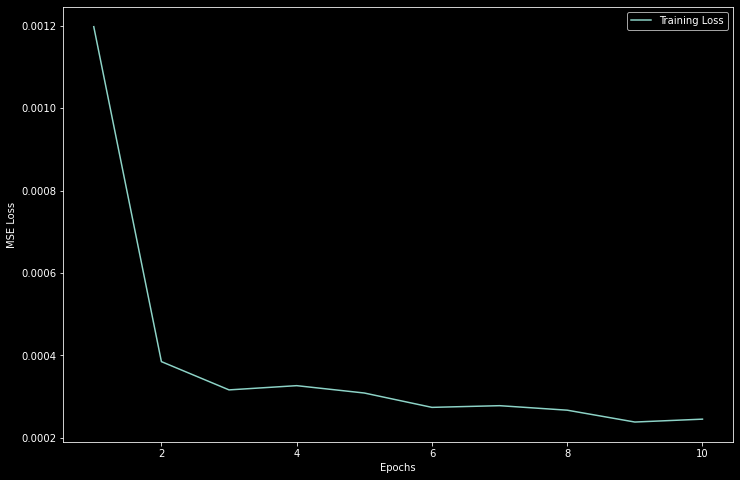

In [131]:
loss = history.history['loss']
epochs = range(1, 11)
plt.figure(figsize=(12,8))
plt.plot(epochs, loss)
plt.legend(['Training Loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show();

In [8]:
model.evaluate(pred, y_test)

NameError: name 'model' is not defined

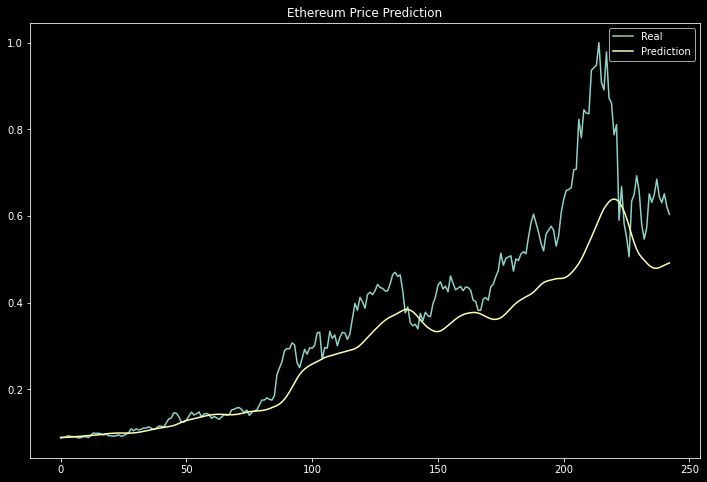

In [132]:
pred = model.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, label='Real')
plt.plot(pred, label='Prediction')
plt.title('Ethereum Price Prediction')
plt.legend()
plt.show()

What this code did was use 90-day batches to predict one day in the future. It used the training set of the first 1800 days. The last 333 days were used as the test set! 

##### Forecast

In [ ]:
close_data = close_data.reshape((-1))

def predict(num_prediction, model):
    prediction_list = close_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
    
def predict_dates(num_prediction):
    last_date = df['Date'].values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

num_prediction = 30
forecast = predict(num_prediction, model)
forecast_dates = predict_dates(num_prediction)

#### LSTM with TimeseriesGenerator

In [3]:
data = np.asarray(df['Close']).reshape(-1,1)

In [4]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# split into train and test sets
train_size = int(len(data) * 0.6)
test_size = len(data) - train_size

train = data[0:train_size,:]
test = data[train_size:len(data),:]

In [5]:
# Use TimeseriesGenerator to create the samples
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 90

train_data = TimeseriesGenerator(train, train,
    length=n_input,
    batch_size=3)

test_data = TimeseriesGenerator(test, test,
    length=n_input,
    batch_size=1)

In [8]:
# Create the model!
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(units=32, return_sequences=True,
                  input_shape=(90,1), dropout=0.2))
model.add(LSTM(units=32, return_sequences=True,
                  dropout=0.2))
model.add(LSTM(units=32, dropout=0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy', 'MeanSquaredError'])

# Summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 90, 32)            4352      
_________________________________________________________________
lstm_4 (LSTM)                (None, 90, 32)            8320      
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Run the model
history = model.fit_generator(train_data, epochs=2)

Epoch 1/2
397/397 [==============================] - 18s 45ms/step - loss: 8.4526e-04 - accuracy: 0.0000e+00 - mean_squared_error: 8.4526e-04
Epoch 2/2
397/397 [==============================] - 18s 45ms/step - loss: 5.0885e-04 - accuracy: 0.0000e+00 - mean_squared_error: 5.0885e-04


In [11]:
# Predict the data using the model!
train_pred = model.predict_generator(train_data)
test_pred = model.predict_generator(test_data)

# Inverse the transformation we did earlier so we have the true values of the predictions
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)


Instructions for updating:
Please use Model.predict, which supports generators.


One of the hard parts of using TimeseriesGenerator is the variable values are a little difficult to extract because they are split into "batches". Luckily, user "Tony607" created some useful helper functions!! His notebook can be found at https://github.com/CamLadd/Keras_TimeseriesGenerator/blob/master/TimeseriesGenerator.ipynb

In [12]:
def get_y_from_generator(gen):
    '''
    Get all targets y from a TimeseriesGenerator instance.
    '''
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y

In [13]:
# Get the y values
train_output = get_y_from_generator(train_data)
test_output = get_y_from_generator(test_data)

# Reverse transform those
train_output = scaler.inverse_transform(train_output)
test_output = scaler.inverse_transform(test_output)

(1189, 1)
(764, 1)


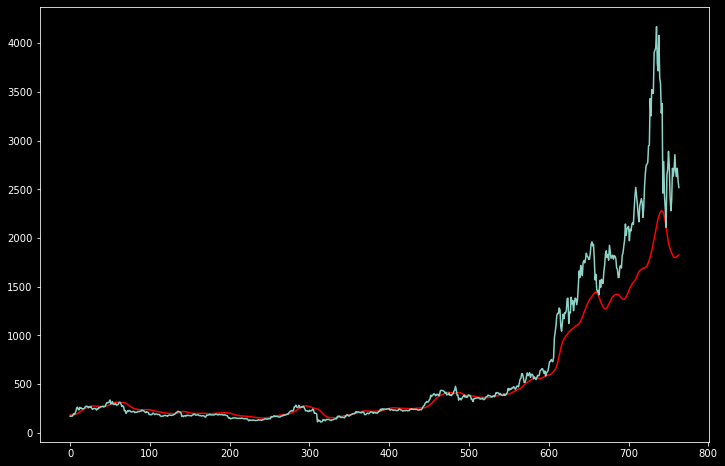

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(test_pred, color='red')
ax.plot(test_output)

The accuracy of the model is decent enough. We can use it to try and forecast!

##### Forecast

In [ ]:
close_data = close_data.reshape((-1))

def predict(num_prediction, model):
    prediction_list = close_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
    
def predict_dates(num_prediction):
    last_date = df['Date'].values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

num_prediction = 30
forecast = predict(num_prediction, model)
forecast_dates = predict_dates(num_prediction)